# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Axie Infinity (AXS) Moving Towards Bullish Recovery?.  Axie Infinity (AXS) is one of the fourth most popular metaverse tokens in the CoinMarketCap ranking. It has lost 53.30%, 58.55%, and 62.71% in the past 30 days, 60 days, and 90 days, respectively. On the total market capitalization, it is in the 44th position. Presently, Axie Infinity’s price is $21.46, with a 24 hours increase of 1.44%. Some of the reasons why Axie Infinity (AXS) could be a part of recovery include: Its recent bullish run Formation of inverted head shoulders Its ability to withstand negative trends Its comparison with top cryptocurrencies Axie Infinity’s Recent Bullish Run Axie Infinity (AXS) gained 11.7% of its lost price due to the crypto winter in the past seven days. Following a peak of $165.37 on November 6th, 2021, the gain indicates that the price might recover more in the upcoming weeks. Its seven-day low price is $17.57. It appears the price of AXS is in the process of bouncing back. Formation of an Inverted Head and Shoulders An inverted head and shoulders pattern indicates a strong bullish run is about to begin. The present sharp of the 1-day chart of Axie Infinity (AXS) shows its formation. It could mean that the current buyers could make a quick gain soon. AXS’ Present Ability to Withstand Negative News Cryptocurrency markets can be affected by the news. However, Axie Infinity (AXS) has remained profitable despite the recent hack of its discord server that cost them some tokens. This turn of an e... ... [| Skaityti daugiau](https://www.cryptoknowmics.com/news/axie-infinity-axs-moving-towards-bullish-recovery/?utm_source=rss&utm_medium=rss&utm_campaign=axie-infinity-axs-moving-towards-bullish-recovery) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- North Korea: Fighting Covid with traditional medicine.  As Covid spreads in North Korea, state media has urged the use of traditional medicine against the virus. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/61508440) 

### Kainų kaita pandemijos metu

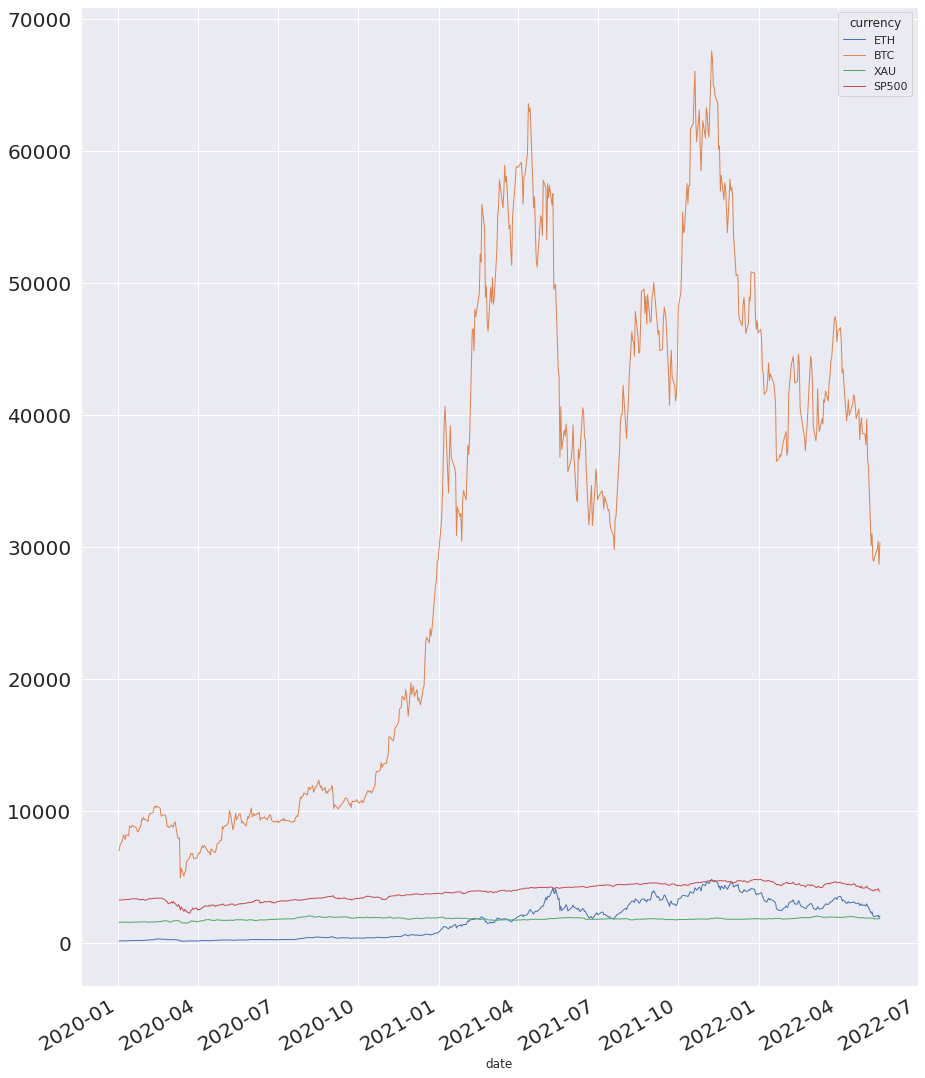

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903061,0.248100,0.924353
BTC,0.903061,1.000000,0.196926,0.872676
XAU,0.248100,0.196926,1.000000,0.376891
SP500,0.924353,0.872676,0.376891,1.000000


In [8]:
#hide ### Koreliacijos matrica.

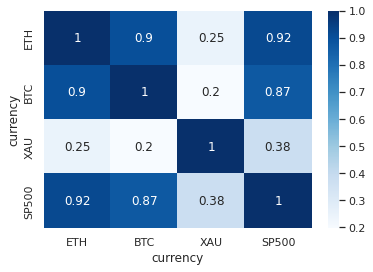

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')